<a href="https://colab.research.google.com/github/AlexeyTri/Home_work_NN/blob/main/HomeWork_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

In [3]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/AlexeyTri/Home_work_NN/refs/heads/main/data/wine.data")

In [4]:
 y = df_wine["1"].values

In [5]:
df_wine

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
X = df_wine[df_wine.columns[1:]].values

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier()

In [18]:
acc_score = []
plot= []
for i in range(1, 51, 1):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=i)
    acc_score.append((i, cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean()))
    plot.append(cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean())

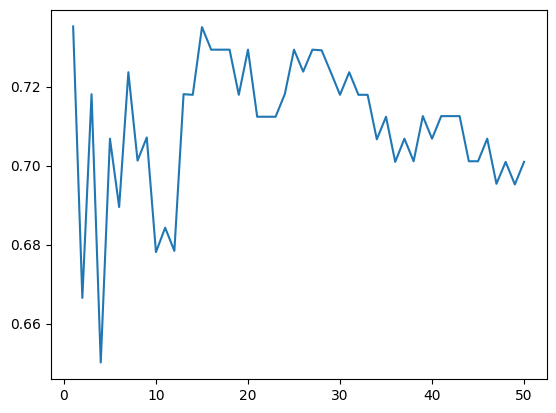

In [19]:
plt.plot(range(1, 51,1), plot)

In [20]:
sorted(acc_score, key=lambda acc_score: acc_score[1], reverse=True)[0]

(1, np.float64(0.7352380952380952))

In [11]:
X_scale = scale(X)

In [12]:
acc_score = []
plot= []
for i in range(1, 51, 1):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=i)
    acc_score.append((i, cross_val_score(knn, X_scale, y, cv=kf, scoring='accuracy').mean()))
    plot.append(cross_val_score(knn, X_scale, y, cv=kf, scoring='accuracy').mean())

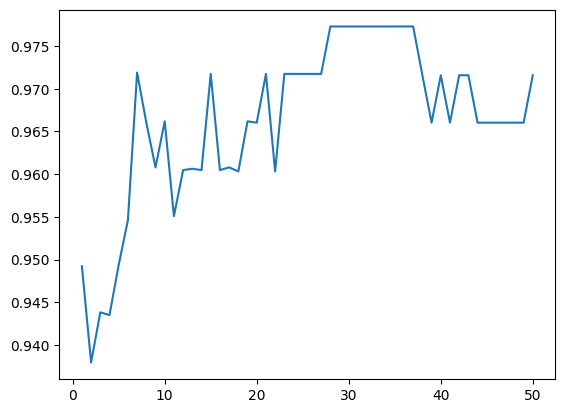

In [13]:
plt.plot(range(1, 51,1), plot)

In [14]:
sorted(acc_score, key=lambda acc_score: acc_score[1], reverse=True)[0]

(28, np.float64(0.9773015873015873))